#### Polynomial fitting using DEAP
- Using an evolutionary algorithm, fit for the parameters a, b, c, and d to a third degree polynomial curve of the form y = ax^3 + bx^2 + cx + d.  
- Refer to https://deap.readthedocs.io/en/master/ for the package documentation.

#### Steps:

a. [Prepare DEAP routine](#a)

b. [Run genetic algorithm optimization](#b)

c. [Compare Fitted Parameters to Dummy Data](#c)

***

#### a. Prepare DEAP Routine<a id='a'></a>

In [1]:
import random

from deap import base
from deap import creator
from deap import tools

import numpy as np

from deap import algorithms

import matplotlib.pyplot as plt

numVariables=4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()


toolbox.register("attr_init", random.uniform, -10, 10)

toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_init, numVariables)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


#create function=================================
def myFunc(pars):
    """Calculate a third degree polynomial: y = ax^3 + bx^2 + cx + d
    """
    y = pars[0]*x**3 + pars[1]*x**2 + pars[2]*x + pars[3]
    return y

x=np.linspace(-10,10, 100)
pars=[9, 3, 9, 2]
noise=np.random.uniform(-500, 500,100)
y=myFunc(pars)+noise

def rmse(individual):
    """Calculate the root mean square error
    """
    sse=np.average((y-myFunc(individual))**2)
    return np.sqrt(sse), #a comma is somehow needed
#=================================================


In [2]:
#register all parameters

toolbox.register("evaluate", rmse)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
#or
#toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)

#toolbox.register("mate", tools.cxESBlend, alpha=0.1) #invalid
#toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3) #invalid

toolbox.register("select", tools.selTournament, tournsize=3)

#### b. Run Genetic Algorithm Optimization <a id='b'></a>

In [3]:
def main():
    random.seed(64)
    
    #create a population of size n
    pop = toolbox.population(n=200)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)

    best=tools.selBest(pop,1)[0]
    
    print(best)
    
    return pop, stats, hof, best
    
if __name__ == "__main__":
    res=main()


gen	nevals	avg   	std    	min    	max    
0  	200   	3874.6	2241.41	291.655	7490.98
1  	113   	2102.33	1512.11	293.537	7087   
2  	138   	1238.02	1205.58	283.5  	6852.04
3  	117   	855.608	1198.15	283.932	7033.91
4  	119   	633.04 	1029.28	283.932	6802.86
5  	128   	677.839	1131.34	283.857	6771.83
6  	106   	532.665	843.164	283.703	6807.55
7  	120   	654.088	1110.51	282.746	6819.85
8  	133   	744.67 	1230.3 	282.703	6801.12
9  	102   	616.139	929.756	282.703	4199.67
10 	107   	526.859	857.717	282.703	6819.85
11 	128   	628.235	963.553	282.66 	4196.95
12 	143   	548.139	817.567	282.66 	4145.7 
13 	131   	541.557	881.987	282.194	4196.54
14 	119   	529.459	778.25 	282.194	4199.66
15 	123   	513.257	743.884	282.194	4196.54
16 	115   	458.762	631.83 	282.194	3111.8 
17 	126   	532.431	749.31 	282.194	3148.8 
18 	122   	548.314	750.864	282.194	3148.8 
19 	119   	484.948	645.027	282.194	3111.8 
20 	125   	479.33 	622.732	282.194	3089.93
21 	115   	494.6  	640.19 	282.194	2721.4 
22 	112   	40

#### c. Compare Fitted Parameters to Dummy Data <a id='c'></a>

actual: [9, 3, 9, 2]
fitted: [9.135096148109348, 2.2431558017356537, 3.407030504991493, 9.956052825351733]
rmse: 282.19375774868143


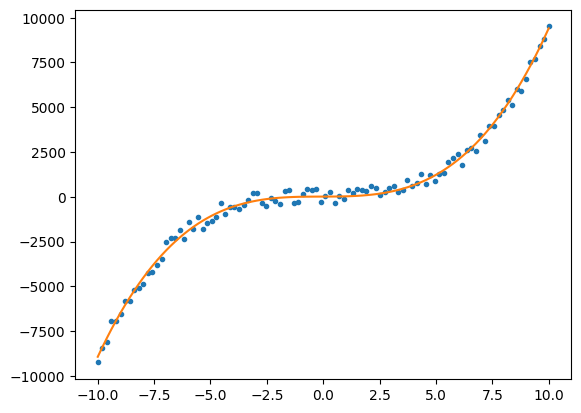

In [4]:
#actual: [9, 3, 9, 2]

print("actual: %s" %pars)
print("fitted: %s" %res[-1])
print("rmse: %s" %rmse(res[-1]))

y_fit=myFunc(res[-1])
plt.plot(x,y,'.')
plt.plot(x,y_fit)
plt.show()


***